# Project One

# Factors Encouraging Fast Food Restaurants to Enter the Market

## 1.1 Introduction



Fast food comprises a significant portion of our daily meals. People choose fast food due to its convenience, affordability, and delectable flavors. However, they also reject fast food as "junk food" due to its high-calorie content.

The primary dataset contains information about 10,000 fast-food restaurants located across America. It includes the names, categories, detailed addresses, dates of addition, and websites of fast food restaurants. The data on dates indicates that the number of fast-food restaurants is increasing across America. Economic theory posits that restaurants only enter the market when they can generate profits, and this project aims to investigate the factors that contribute to the profitability of fast-food restaurants.

In this project, the independent variables are the population, population density, the real income of citizens, and the number and brands of existing restaurants in the city. The analysis aims to explore the relationship between these factors and the number of fast-food restaurants in each city. The primary dataset can be accessed on Datafiniti, and the data are cited from Kaggle. The data on population, population density, and real income are obtained from Simplemap.

The results of the investigation indicate that four of the listed factors exhibit a clear relationship with the number of fast-food restaurants in a given region. Some findings are consistent with the hypothesis that regions with lower average income and higher populations have more fast-food restaurants. The redundant variable is population density, which does not exhibit a clear relationship with the number of restaurants. Contrary to the hypothesis, the data indicate that fast-food restaurants prefer cities that are already occupied by many competitors, especially those with more famous brands.

## 1.2 Data Cleaning

Firstly, import the numpy and pandas, read the dataset as a Dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

fastfood_data = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')

Check whether there is any data missing:

In [2]:
fastfood_data.isnull().sum()

id             0
dateAdded      0
dateUpdated    0
address        0
categories     0
city           0
country        0
keys           0
latitude       0
longitude      0
name           0
postalCode     0
province       0
sourceURLs     0
websites       0
dtype: int64

The names of restaurants in this dataset have some errors, for example, there exist "McDonald's" and "McDonalds" represent the same brand but are not counted together. Remove the punctuation to make similar names the same.

Then get the top ten fast-food restaurant brands across America.

In [3]:
import string

fastfood_data.name=fastfood_data.name.apply(lambda a:''.join([i for i in a 
                            if i not in string.punctuation]))

fastfood_data.name.value_counts()[:10]

McDonalds          1940
Taco Bell          1032
Burger King         833
Subway              776
Arbys               666
Wendys              628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Dominos Pizza       215
Name: name, dtype: int64

Convert the date object into a more readable form.

In [4]:
from datetime import datetime
from dateutil.parser import parse

In [5]:
fastfood_data['dateAdded'] = fastfood_data['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

print(fastfood_data['dateAdded'].head())

0   2015-10-19 23:47:58
1   2015-10-19 23:47:58
2   2016-03-29 05:06:36
3   2017-01-03 07:46:11
4   2018-06-26 02:59:43
Name: dateAdded, dtype: datetime64[ns]


Import the population and income data.

In [6]:
pop_data = pd.read_csv('uscities.csv')

Check whether there is data missing:

In [7]:
pop_data.isnull().sum()

city                           0
province                       0
lat                            0
lng                            0
population                 74240
population_proper          74240
density                        0
income_household_median    77708
dtype: int64

Remove the rows with null data:

In [8]:
pop_data = pop_data.dropna()

## 1.3 Summary Statistics Tables

In the graph analysis part of this project, only the date added, city name, and the restaurant name are required.

In [9]:
fastfood_data1 = fastfood_data.drop(fastfood_data.columns[[0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14]], axis=1)

Then count the number of restaurants in the same city.

In [10]:
cityList = fastfood_data1.city.value_counts()
print('The number of cities in the list is:')
print(cityList.shape[0])

The number of cities in the list is:
2764


Restructure the data to a dataframe and set the city name as indices. List the top ten cities that have the most fast-food restaurants.

In [11]:
city_data = cityList.to_frame()
city_data = city_data.reset_index()
city_data = city_data.rename(columns = {"index": "city", "city": "number_of_restaurants"})
city_data = city_data.set_index("city")
city_data.head(5)

,number_of_restaurants
city,
Houston,107
Las Vegas,82
Phoenix,78
Columbus,72
Dallas,66


The table "city_data" utilizes city names as indices and records the number of restaurants present in each city. This variable represents the dependent variable in my research, and my objective is to identify the factors that influence this variable. The purpose of this table is to facilitate merging with tables that contain independent variables, allowing for the creation of graphs that illustrate the relationships between these variables.

In my hypothesis, I posit that three key factors affecting the number of restaurants in a given area are income, population, and population density.

It is widely recognized that a higher population typically leads to greater business opportunities, particularly for industries that offer essential goods and services. As a result, population may be positively correlated with the number of restaurants in an area. However, an important question arises regarding the relative importance of population versus population density. In areas with high population density, the pace of life is typically faster, and the overall quality of life may be lower. Consequently, it is possible that the two factors may be combined, and population density may be a more significant driver of the number of restaurants in such areas.

With respect to income, it is likely that there is a negative correlation with restaurant numbers. Individuals with lower incomes may be more inclined to seek out cheaper options, such as fast food, rather than higher-end dining establishments.

To test my hypothesis, I have constructed a table called "population_by_city," which contains data on population, population density, and median household income for cities across the United States. To isolate the effects of income on restaurant numbers, I have chosen to analyze the relationship between median income and the number of fast-food restaurants per capita in each city.

In [12]:
population_by_city = pop_data.drop(pop_data.columns[[1, 2, 3, 5]], axis = 1)

Merge these two tables and remove rows that contain null.

In [13]:
data1 = pd.merge(population_by_city, city_data, on = "city", how = "outer")
data1 = data1.dropna()
data1 = data1[data1.population > 50000]
data1 = data1.set_index("city")
data1

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0
Los Angeles,12121244.0,3267.6,69778.0,64.0
Chicago,8595181.0,4576.6,65781.0,57.0
Miami,5711945.0,4945.7,47860.0,62.0
Dallas,5668165.0,1522.2,58231.0,66.0
...,...,...,...,...
Summerville,50318.0,956.8,64507.0,3.0
Cypress,50279.0,2868.8,109180.0,9.0
Downers Grove,50209.0,1298.6,105217.0,5.0


Sort the merged data according to the three varaibles.

In [14]:
data_pop = data1.sort_values("population", ascending= False)

In [15]:
data_density = data1.sort_values(by = "density", ascending = False)

In [16]:
data_income = data1.sort_values(by = "income_household_median", ascending = False)
data_income["restaurant_population"] = data_income["number_of_restaurants"]/data_income["population"]

Upon completing the merging process, these three tables can be utilized to create graphs that illustrate the relationships between the variables of interest.

In addition to population, population density, and income, the other two independent variables under consideration are the number of existing restaurants and the brand of existing restaurants. When business owners consider opening a new restaurant, it is essential that they can generate profits, which means they must have confidence in their ability to attract customers and outperform competitors in the same region. If there are already numerous competitors in a specific location and the market is saturated, the prospective business may abandon the idea of establishing a new restaurant.

In the fast-food restaurant industry, brand differentiation serves as a potential entry barrier. For lesser-known restaurants seeking to expand to new locations, the presence of established competitors such as McDonald's may prove discouraging. However, for mega brands themselves, this factor may have little impact on their expansion plans.

To examine changes in the number of restaurants over time, I have created two tables that document how restaurant numbers in each city have evolved. The first table records restaurant numbers prior to specific dates, with the benchmarks set at 2016-1-1, 2017-1-1, and 2018-1-1. The second table calculates the number of restaurants operated by the top three brands and the overall increase in restaurant numbers during 2016 and 2017.

In [17]:
def bdate (df, datetime):
    return df[df.dateAdded < datetime]


def adate (df, datetime):
    return  df[df.dateAdded >= datetime]


def byear (df, year):
    beforey = bdate(df, datetime(year, 1, 1))
    beforey = beforey.reset_index()
    cityListy = beforey.city.value_counts()
    city_datay = cityListy.to_frame()
    city_datay = city_datay.reset_index()
    city_datay = city_datay.rename(columns = {"index": "city", "city": "number before {}".format(year)})
    city_datay = city_datay.set_index("city")
    return city_datay

In [18]:
before16 = byear(fastfood_data, 2016)
before17 = byear(fastfood_data, 2017)
before18 = byear(fastfood_data, 2018)
city_datai = city_data.reset_index()
with16 = pd.merge(city_datai, before16, on = 'city')
with17 = pd.merge(with16, before17, on = 'city')
with18 = pd.merge(with17, before18, on = 'city')
sample = with18

In [19]:
fastfood_data_f3 = fastfood_data[fastfood_data['name'].isin(['McDonalds', 'Taco Bell', 'Burger King'])]
before162 = byear(fastfood_data_f3, 2016)
before172 = byear(fastfood_data_f3, 2017)
before182 = byear(fastfood_data_f3, 2018)
city_datai2 = city_data.reset_index()
with162 = pd.merge(city_datai2, before162, on = 'city')
with172 = pd.merge(with162, before172, on = 'city')
with182 = pd.merge(with172, before182, on = 'city')
with182['number added during 2016'] = with18['number before 2017'] - with18['number before 2016']
with182['number added during 2017'] = with18['number before 2018'] - with18['number before 2017']
sample_top = with182
sample_top.head(10)

,city,number_of_restaurants,number before 2016,number before 2017,number before 2018,number added during 2016,number added during 2017
0,Houston,107,12,29,38,55,21
1,Las Vegas,82,7,19,30,40,21
2,Phoenix,78,15,24,28,34,7
3,Columbus,72,9,24,27,33,18
4,Dallas,66,4,22,22,39,11
5,Orlando,65,7,24,30,25,26
6,Los Angeles,64,15,22,24,22,18
7,Miami,62,6,15,31,23,30
8,Chicago,57,3,9,11,31,15
9,San Antonio,54,2,10,14,29,15


## 1.4 Plots, Histograms, Figures

In order to illustrate the relationship between the independent variables and the number of restaurants in the market, I have chosen to create scatter plots. Each of the three diagrams will feature population, population density, and income on the x-axis, while the number of restaurants will be plotted on the y-axis.

(0.0, 10000000.0)

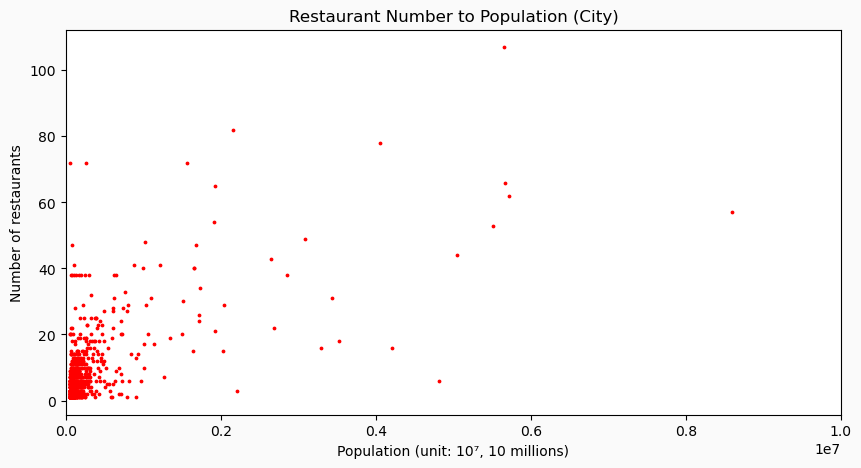

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_pop.plot(kind = "scatter", x = "population", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Restaurant Number to Population (City)")
ax.set_xlabel("Population (unit: 10\N{SUPERSCRIPT SEVEN}, 10 millions)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e7)

Each red dot on the scatter plot represents a city's data. The distribution of the dots shows that the majority of cities have populations of less than 1 million, with less than 20 fast-food restaurants in operation. As the population increases, the dots generally correspond to larger restaurant numbers, indicating that metropolitan areas typically attract more fast-food restaurants.

(0.0, 10000.0)

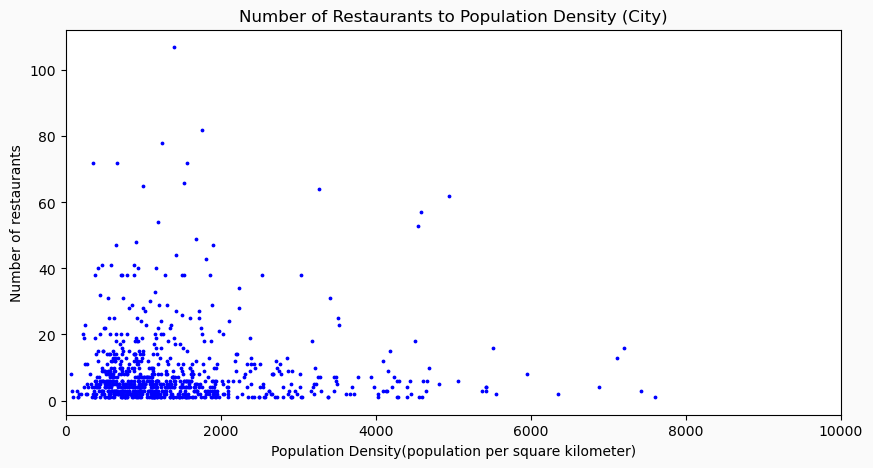

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_density.plot(kind = "scatter", x = "density", y = "number_of_restaurants", ax = ax, s = 3, color = "blue")

ax.set_title("Number of Restaurants to Population Density (City)")
ax.set_xlabel("Population Density(population per square kilometer)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e4)

The distribution of dots on the scatter plot indicates that there is no clear relationship between population density and the number of fast-food restaurants. While cities with low population density tend to have few restaurants, the cities most favored by the fast-food industry are not necessarily densely populated.

(0.0, 100000.0)

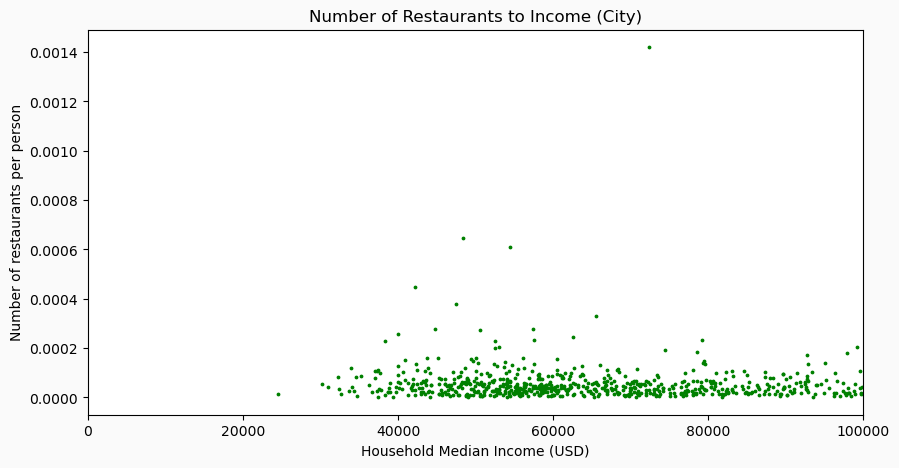

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income (City)")
ax.set_xlabel("Household Median Income (USD)")
ax.set_ylabel("Number of restaurants per person")

plt.xlim(0, 1e5)

The scatter plot indicates an ambiguous relationship between restaurant numbers and income. While cities with a higher number of fast-food restaurants per person are more frequently found in poorer regions, the difference is not significant enough to observe a clear trend. It is possible that population still has an effect on the analysis, so I have divided the cities into two groups based on a benchmark population of 70,000.

(0.0, 100000.0)

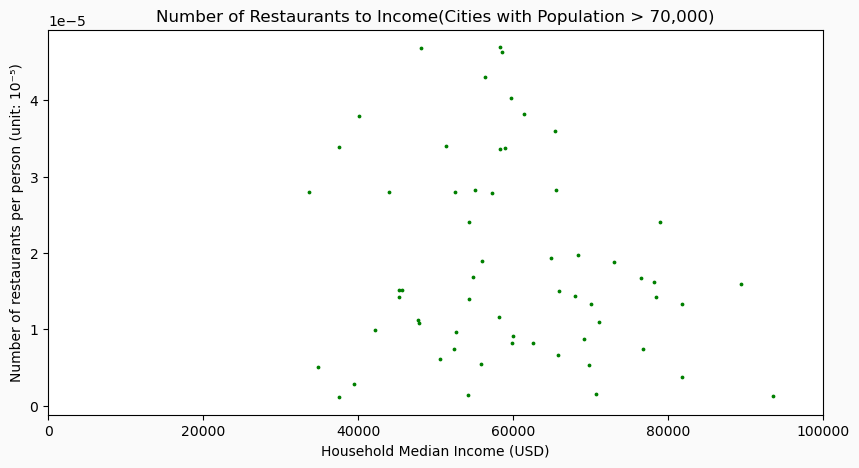

In [23]:
data_income2 = data_income[data_income.population > 700000]

fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income2.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Cities with Population > 70,000)")
ax.set_xlabel("Household Median Income (USD)")
ax.set_ylabel("Number of restaurants per person (unit: 10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FIVE})")

plt.xlim(0, 1e5)

(0.0, 100000.0)

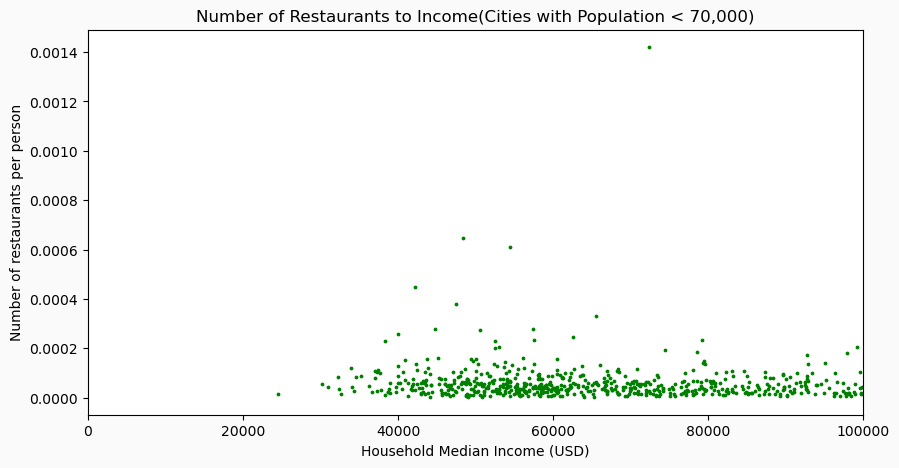

In [24]:
data_income3 = data_income[data_income.population < 700000]

fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income3.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Cities with Population < 70,000)")
ax.set_xlabel("Household Median Income (USD)")
ax.set_ylabel("Number of restaurants per person")

plt.xlim(0, 1e5)

Based on the two scatter plots presented, it appears that population size is likely the cause of the ambiguity in the relationship between restaurant numbers and income. The first scatter plot represents cities with populations greater than 70,000 and displays a negative relationship between restaurant numbers and household income. However, the second scatter plot, representing cities with populations less than or equal to 70,000, displays a distribution of dots similar to the original graph. Based on this observation, it is reasonable to hypothesize that population size only becomes a significant factor when the population is large enough.

Plotting bar charts for the top eight cities can help visualize the effects of existing restaurants on the market. The first chart can show the overall change in restaurant numbers, while the second chart can specifically show how the existence of top restaurants affects the market.

<AxesSubplot:title={'center':'Restaurant Number Change in Top 8 Cities'}, xlabel='City Name', ylabel='Number'>

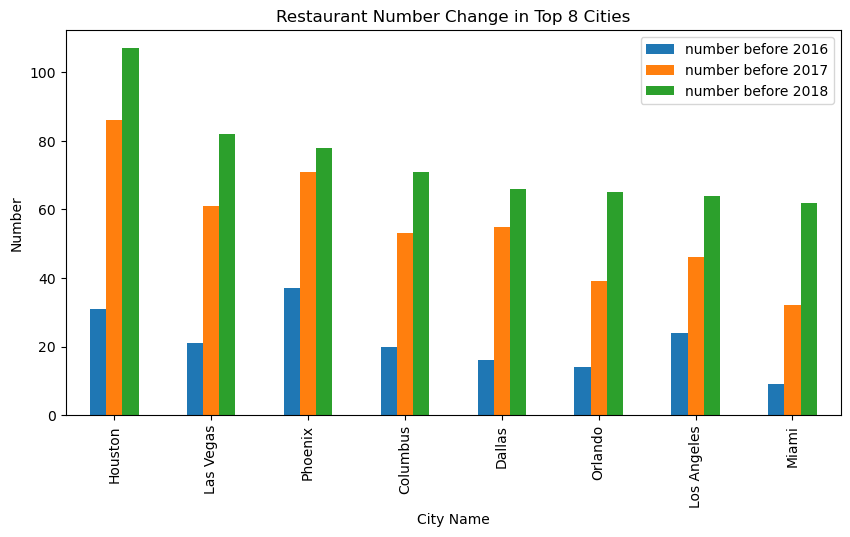

In [25]:
samplea = sample.head(8)
samplea = samplea.drop(samplea.columns[[1]], axis = 1)
samplea = samplea.set_index('city')
samplea.plot.bar(title = "Restaurant Number Change in Top 8 Cities", figsize = (10, 5), xlabel = "City Name", ylabel = "Number")

<AxesSubplot:title={'center':'2017 Contrast: Number of Top 3 Restaurant and Number Added'}, xlabel='City Name', ylabel='Number'>

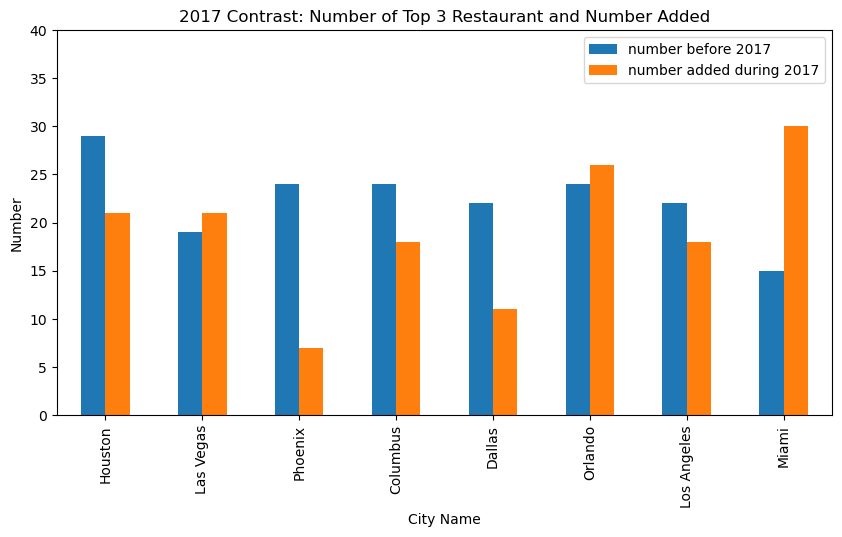

In [26]:
samplec = sample_top.head(8)
samplec = samplec.drop(samplec.columns[[1, 2, 4, 5]], axis = 1)
samplec = samplec.set_index('city')
samplec.plot.bar(title = "2017 Contrast: Number of Top 3 Restaurant and Number Added", figsize = (10, 5), xlabel = "City Name", ylabel = "Number", ylim = (0, 40))

Unfortunately, the bar charts yield random results, making it insufficient to draw any conclusion from them. In the first diagram, blue, orange, and green respectively represent the number of restaurants in 2016, 2017, and 2018. A comparison of the data in 2017 and 2018 for Orlando and Phoenix indicates that more fast-food restaurants were built in the less competitive city, while the comparison between Phoenix and Houston yields the opposite result.

Similarly, in the second graph, Phoenix and Orlando have similar numbers before 2017 but show a significant difference in the increment quantity.

Such phenomena may occur because the sample size is too small and not representative enough, and there is a lack of elimination of other independent variables.

The data from Las Vegas revealed that the number of fast-food restaurants has significantly increased, especially those of McDonald's. In Phoenix, few new restaurants were established, given that several large brands already exist in the city. Houston's data exhibits trends differ from those of the other two cities: the larger brands opened more restaurants, despite having already captured the major portion of the market. The only common feature of these three graphs is that the smaller brands show no significant increase in their restaurant numbers over the time period.

# Project Two

## 2.1 The Message

Based on the analysis presented in the previous sections, the relationships between three distinct variables and the number of restaurants have been established.

The nutritional deficiencies of fast food have been the subject of consistent criticism. Although fast food is appetizing, inexpensive, and convenient for individuals living in today's fast-paced society, it is typically high in calories, and excessive consumption can result in obesity and other related conditions. Generally speaking, fast food is categorized as an inferior good, which indicates that individuals purchase less of it as their income rises and begin to prioritize their overall quality of life. As predicted, urban areas with lower real household incomes are comparatively more attractive to fast food establishments.

A high total population typically indicates an elevated demand for all goods, including fast food. The data suggests that there is a strong positive correlation between population and the number of fast-food restaurants. Population density is not a valid variable since a certain degree of population ensures steady demand, regardless of the level of congestion in that area.

Additionally, the existence of competing fast-food restaurants and the brand of these restaurants also play an important role in the market. If a market is saturated with a large number of existing fast-food restaurants, it might discourage new entries. Furthermore, the presence of well-known brands may also act as a barrier to entry for smaller or lesser-known restaurants.

Overall, these insights suggest that there are multiple factors affecting the number of fast-food restaurants in a given area. By analyzing these factors and their effects, policymakers and business owners can better understand the market and make more informed decisions. For example, business owners may want to focus on areas with a high population and low income, where there is a high demand for fast food but less competition from established brands. Policymakers may want to encourage healthier food options in areas with high rates of obesity, particularly in areas with low income where fast food may be the only affordable option.

To illustrate the established relationships, I have opted to employ trend lines, whereby upward-sloping lines indicate positive correlations, downward-sloping lines indicate negative correlations, and horizontal or vertical lines indicate no correlations.

(0.0, 120.0)

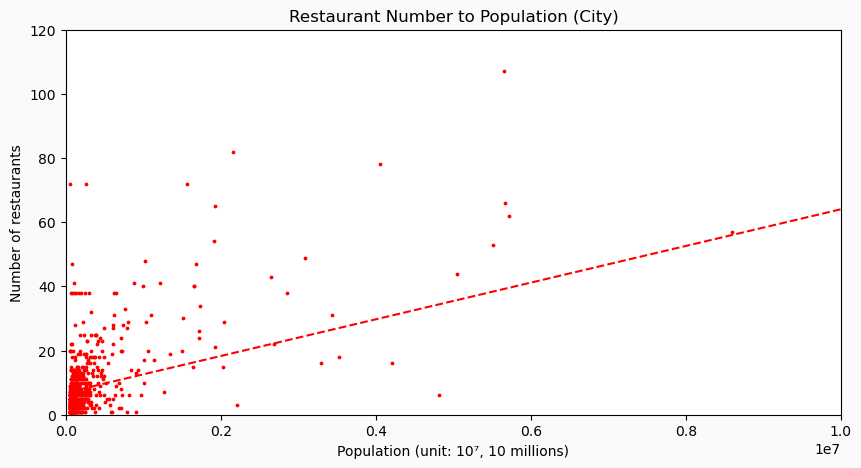

In [27]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_pop.plot(kind = "scatter", x = "population", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Restaurant Number to Population (City)")
ax.set_xlabel("Population (unit: 10\N{SUPERSCRIPT SEVEN}, 10 millions)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e7)


x = data_pop["population"]
y = data_pop["number_of_restaurants"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

plt.ylim(0, 120)

(0.0, 120.0)

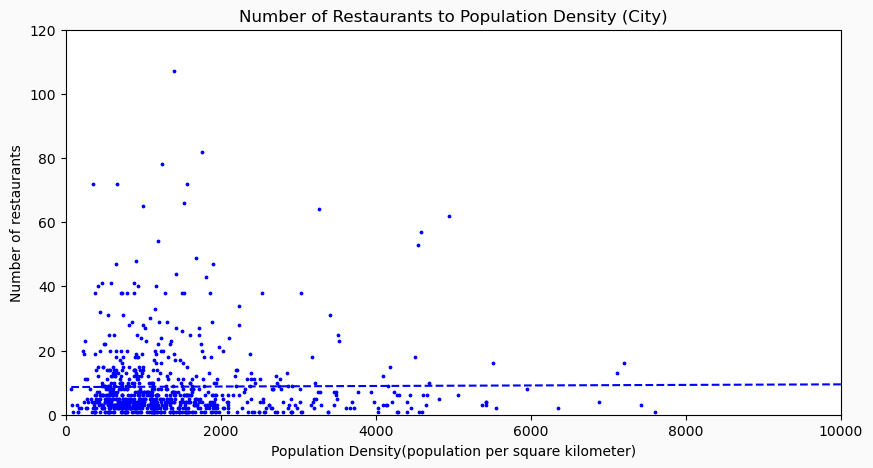

In [28]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_density.plot(kind = "scatter", x = "density", y = "number_of_restaurants", ax = ax, s = 3, color = "blue")

ax.set_title("Number of Restaurants to Population Density (City)")
ax.set_xlabel("Population Density(population per square kilometer)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e4)

x = data_density["density"]
y = data_density["number_of_restaurants"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"b--")

plt.ylim(0, 120)

(0.0, 4.1e-05)

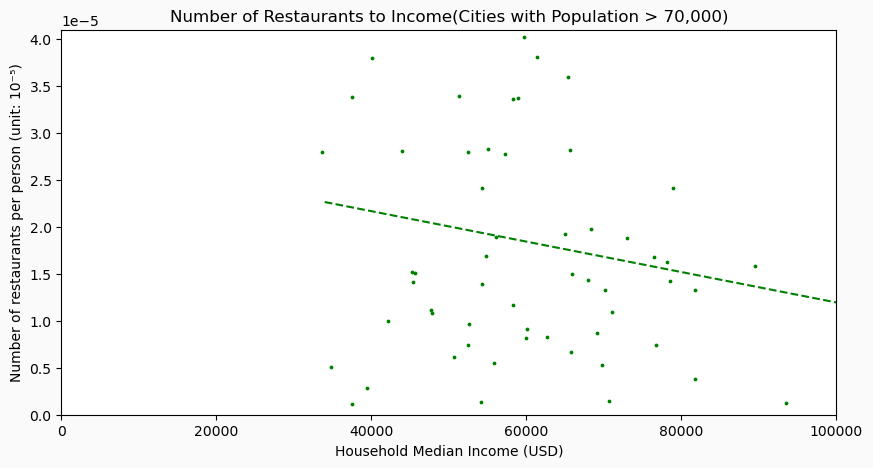

In [29]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income2.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Cities with Population > 70,000)")
ax.set_xlabel("Household Median Income (USD)")
ax.set_ylabel("Number of restaurants per person (unit: 10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FIVE})")

plt.xlim(0, 1e5)

x = data_income2["income_household_median"]
y = data_income2["restaurant_population"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"g--")

plt.ylim(0, 41e-6)

Based on my analysis, the trend line for population displays a distinct upward slope, indicating that fast-food restaurants tend to favor urban areas with high populations. In contrast, the trend line for population density is nearly horizontal, suggesting that it is not a relevant factor.

Regarding the relationship between income and the number of restaurants, my findings indicate that the income trend line should only be drawn for cities with a population greater than 70,000. The trend line displays a downward slope, which signifies that there is a negative relationship between income and restaurant numbers. However, the slope of the income trend line is flatter than that of the population trend line, indicating that the correlation between income and restaurant numbers is weaker than the correlation between population and restaurant numbers.

To examine the relationship between new restaurants and existing restaurants, I have created a histogram that displays the dates of record for each restaurant, which can be interpreted as their establishment dates.

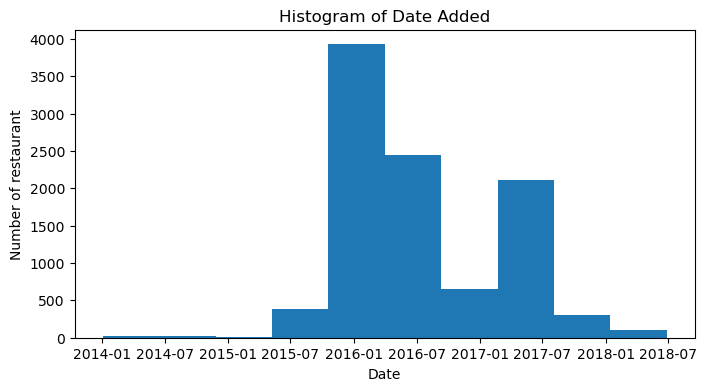

In [30]:
plt.figure(figsize = (8, 4))
plt.hist(fastfood_data1["dateAdded"])
plt.xlabel("Date")
plt.ylabel("Number of restaurant")
plt.title("Histogram of Date Added")
plt.show()

## 2.2 Maps and Interpretations

To further validate my conclusions, I have opted to create maps that illustrate the distribution of fast-food restaurants throughout the United States. To ensure clarity and consistency, I have chosen to use states as the scale for the map, as city-level data may not be available for all areas and excessively detailed maps may complicate the analysis.

In [31]:
import geopandas as gpd
from shapely.geometry import Point
import string

In [32]:
fastfood_data3 = fastfood_data.drop(fastfood_data.columns[[0, 2, 3, 4, 6, 7, 11, 13, 14]], axis=1)
fastfood_data3 = fastfood_data3[fastfood_data3.longitude > -140]
state_df = gpd.read_file("tl_rd22_us_state.zip")
state_df = state_df.drop([5, 31, 34, 35, 36, 40, 41, 49])

Text(0.5, 1.0, "Restaurants' locations Across US")

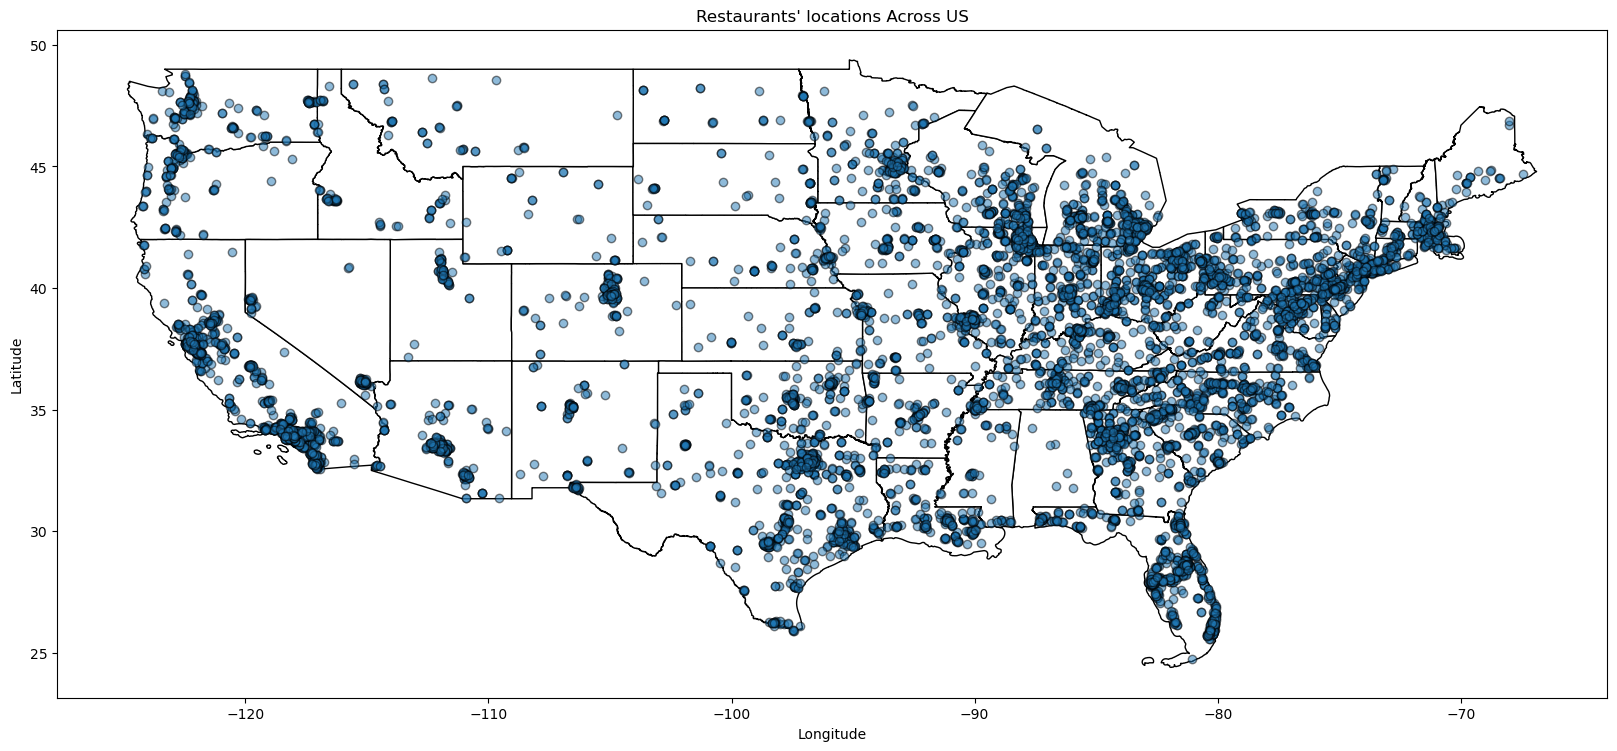

In [33]:
fastfood_data3['Coordinates'] = list(zip(fastfood_data3.longitude, fastfood_data3.latitude))
fastfood_data3['Coordinates'] = fastfood_data3['Coordinates'].apply(Point)
gfd = gpd.GeoDataFrame(fastfood_data3, geometry= 'Coordinates')

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, gax = plt.subplots(figsize=(20,30))

state_df.plot(ax=gax, edgecolor="black", color="white")

gfd.plot(ax = gax, edgecolor='black', alpha = 0.5)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title("Restaurants' locations Across US")

In [34]:
stateList = fastfood_data3.province.value_counts()
state_data = stateList.to_frame()
state_data = state_data.reset_index()
state_data = state_data.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants"})
state_data = state_data.set_index("STUSPS")

Text(0.65, 0.05, 'Number of Restaurants')

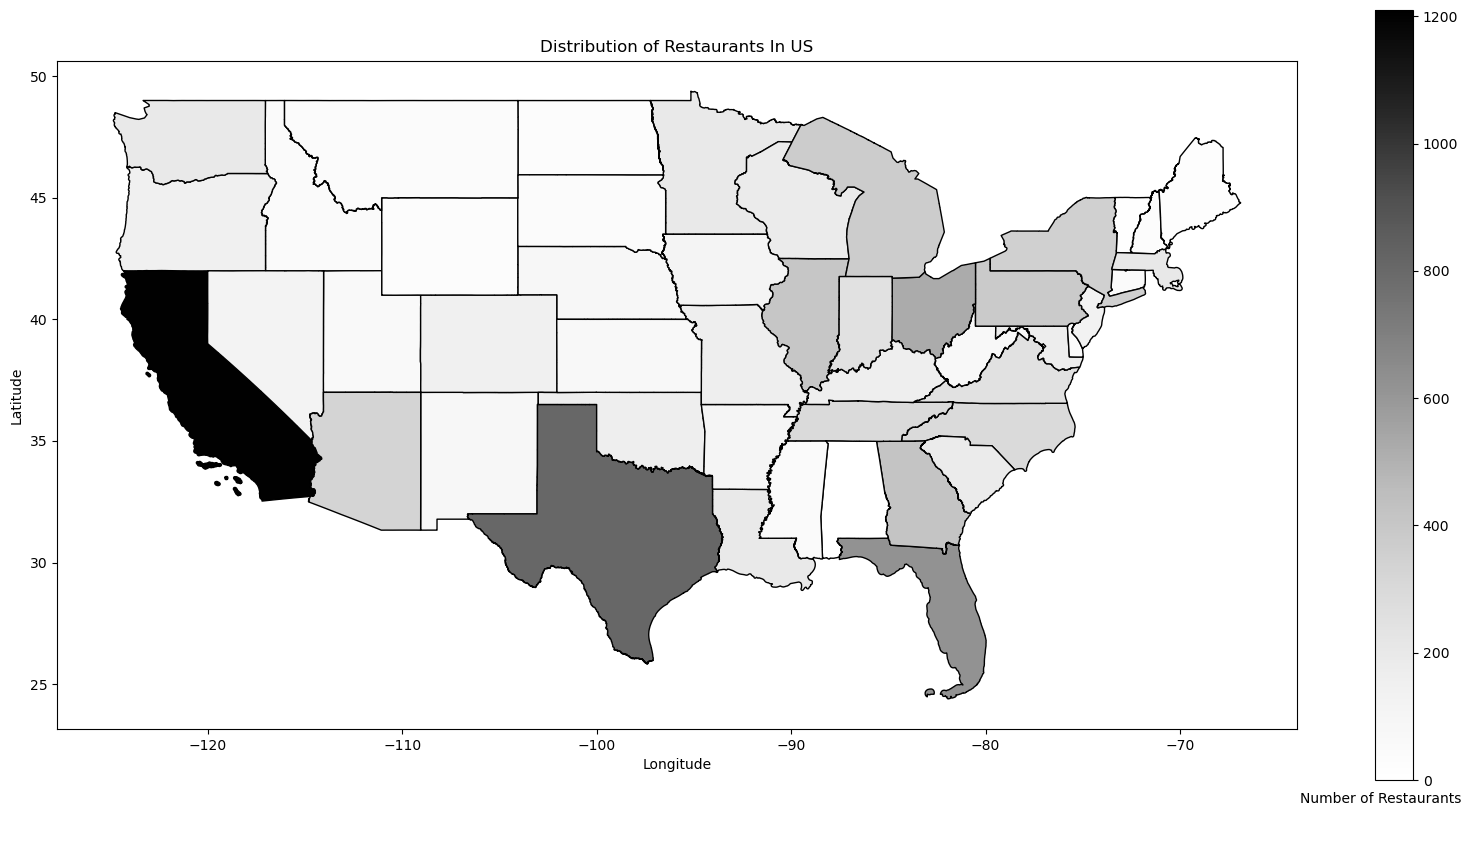

In [35]:
fig, gax = plt.subplots(figsize=(20,10))

state_df1 = pd.merge(state_df, state_data, on = "STUSPS", how = "inner")
state_df1.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants', legend=True, cmap='Greys',
    vmin=0, vmax=1210
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Distribution of Restaurants In US')

gax.annotate('Number of Restaurants',xy=(0.65, 0.05),  xycoords='figure fraction')

Initially, I created a graph that displays the exact location of each fast-food restaurant. However, this graph is not suitable for analysis as the dots overlap, making it difficult to distinguish the differences between states with a high number of restaurants.

As an alternative, I have chosen to use color to represent the number of fast-food restaurants in each state. Darker colors indicate states with a higher number of fast-food establishments.

### Merging with a New Dataset

To obtain information regarding the median income and population of each state, I have imported new datasets from the United States Census Bureau. These tables record the median income and population of each state in the United States.

In [36]:
pop_data_state = pd.read_csv('PEPPOP2019.PEPANNRES-2023-02-28T201127.csv')
pop_data_state = pop_data_state.rename(columns = {"Geographic Area Name": "NAME"})
pop_data_state = pop_data_state.set_index("NAME")
pop_data_state["Population"] = pop_data_state["Population"].astype('int')
pop_data_state = pop_data_state.sort_values(by = ["Population"], ascending=False)
pop_data_state.head(1)

,STUSPS,Population
NAME,,
California,CA,39512223


In [37]:
state_df2 = pd.merge(state_df, pop_data_state, on = "NAME", how = "inner")

The population data and state map have been integrated to derive a population range of 0 to 40,000,000.

In [38]:
income_data_state = pd.read_csv('ACSST1Y2021.S1901-2023-03-01T024229.csv')
income_data_state = income_data_state.rename(columns = {"Geographic Area Name": "NAME"})
income_data_state = income_data_state.set_index("NAME")
income_data_state = income_data_state.sort_values(by = ["Median income"], ascending=False)
income_data_state.head(1)

,Median income
NAME,
Maryland,90203


In [39]:
income_data_state1 = income_data_state.sort_values(by = ["Median income"], ascending=True)
income_data_state1.head(1)

,Median income
NAME,
Puerto Rico,22237


In [40]:
state_df6 = pd.merge(state_df, income_data_state, on = "NAME", how = "inner")

The income data and state map have been amalgamated to obtain the median income range of 20,000 to 100,000.

### Mapping

Then produce a cartographic representation that depicts the spatial distribution of the populace throughout the United States.

Text(0.65, 0.05, 'Population (unit: 10⁷)')

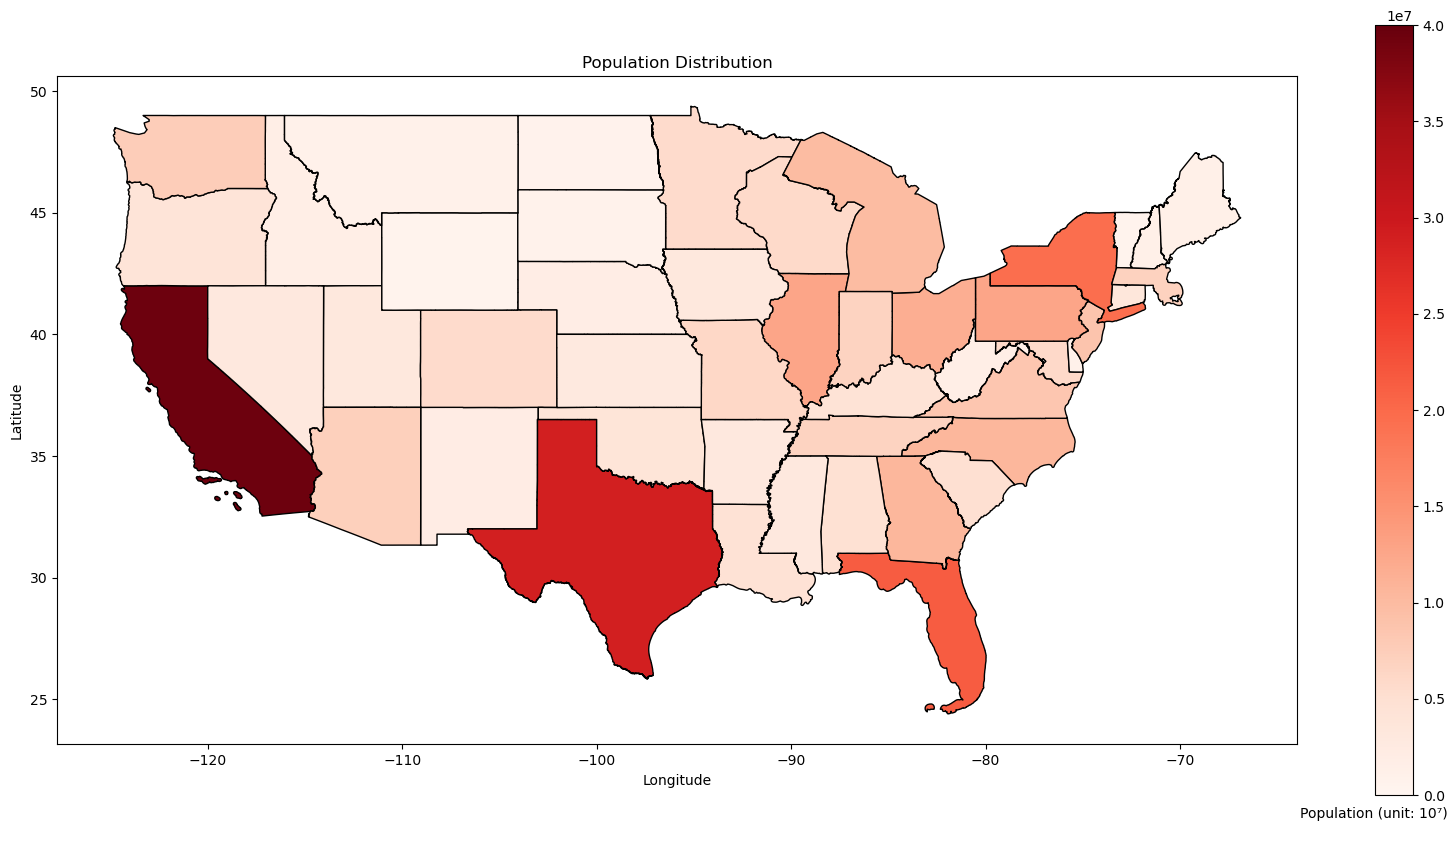

In [41]:
fig, gax = plt.subplots(figsize=(20,10))

state_df2.plot(
    ax=gax, edgecolor='black', column='Population', legend=True, cmap='Reds', label='Data Points',
    vmin=0, vmax=40000000
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Population Distribution')

gax.annotate('Population (unit: 10\N{SUPERSCRIPT SEVEN})',xy=(0.65, 0.05),  xycoords='figure fraction')

The findings exhibit a remarkably strong correlation with the map displaying restaurant counts, as evidenced by the nearly identical color densities in both visualizations.

The subsequent step is to generate a map reflecting income levels.

Text(0.66, 0.05, 'Median Income (USD)')

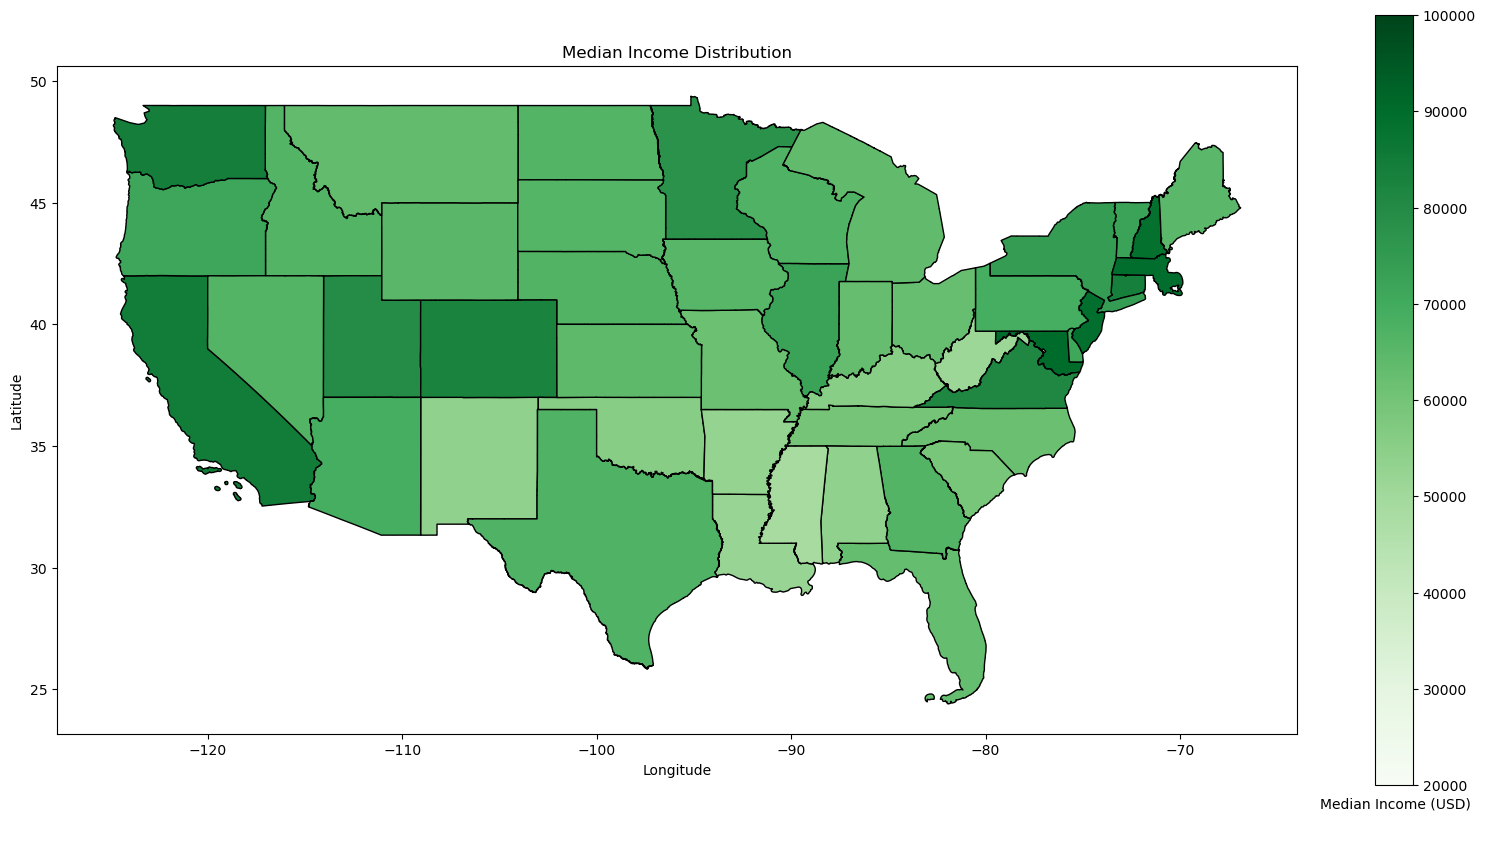

In [42]:
fig, gax = plt.subplots(figsize=(20,10))

state_df6.plot(
    ax=gax, edgecolor='black', column='Median income', legend=True, cmap='Greens',
    vmin=20000, vmax=100000
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Median Income Distribution')

gax.annotate('Median Income (USD)',xy=(0.66, 0.05),  xycoords='figure fraction')

In [43]:
income_pop_data = pd.merge(income_data_state, pop_data_state, on = "NAME", how = "inner")
income_pop_data = income_pop_data[income_pop_data.Population > 5000000]

Text(0.66, 0.05, 'Median Income (USD)')

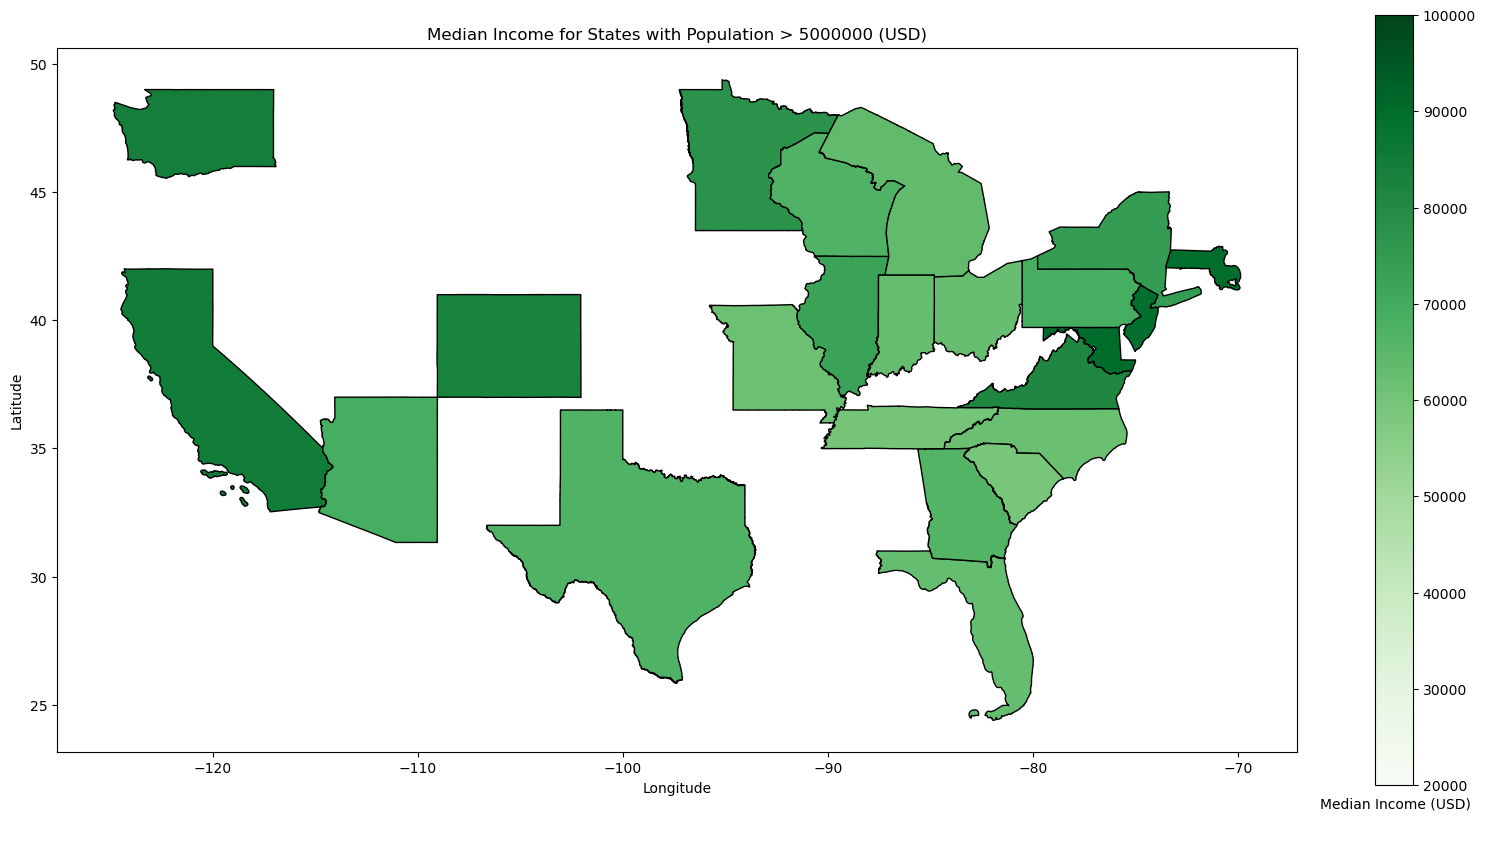

In [44]:
fig, gax = plt.subplots(figsize=(20,10))

state_df3 = pd.merge(state_df, income_pop_data, on = "NAME", how = "inner")
state_df3.plot(
    ax=gax, edgecolor='black', column='Median income', legend=True, cmap='Greens',
    vmin=20000, vmax=100000
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Median Income for States with Population > 5000000 (USD)')

gax.annotate('Median Income (USD)',xy=(0.66, 0.05),  xycoords='figure fraction')

Similar to the outcomes observed in the previous visualizations, the depiction of median income distribution throughout the United States does not exhibit a direct correlation with restaurant count. Therefore, I opted for a comparable approach as previously, and only retained states with populations exceeding 5,000,000. The identical conclusion can be drawn from this analysis.

In the subsequent graph, it is discernible that states such as Minnesota, Colorado, Washington, and those located on the eastern seaboard exhibit elevated median income levels, whereas their corresponding colors on the restaurant map appear relatively muted. In contrast, states such as Texas and Florida manifest relatively lower incomes, as indicated by the darker hues on the restaurant map.

Given that population density has been shown to be inconsequential in relation to restaurant counts, I have decided against creating a corresponding map. Instead, I have proceeded to create two maps, which showcase the number of extant restaurants. As previously indicated, the benchmarks have been maintained, with one map depicting the count prior to 2016-4-3, and the other demonstrating the number of restaurants added thereafter.

In [45]:
dateBefore2 = bdate(fastfood_data3, datetime(2016, 4, 3))
dateAfter2 = adate(fastfood_data3, datetime(2016, 4, 3))

stateList1 = dateBefore2.province.value_counts()
state_data1 = stateList1.to_frame()
state_data1 = state_data1.reset_index()
state_data1 = state_data1.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants_before"})
state_data1 = state_data1.set_index("STUSPS")

Text(0.645, 0.05, 'Number of Restaurants')

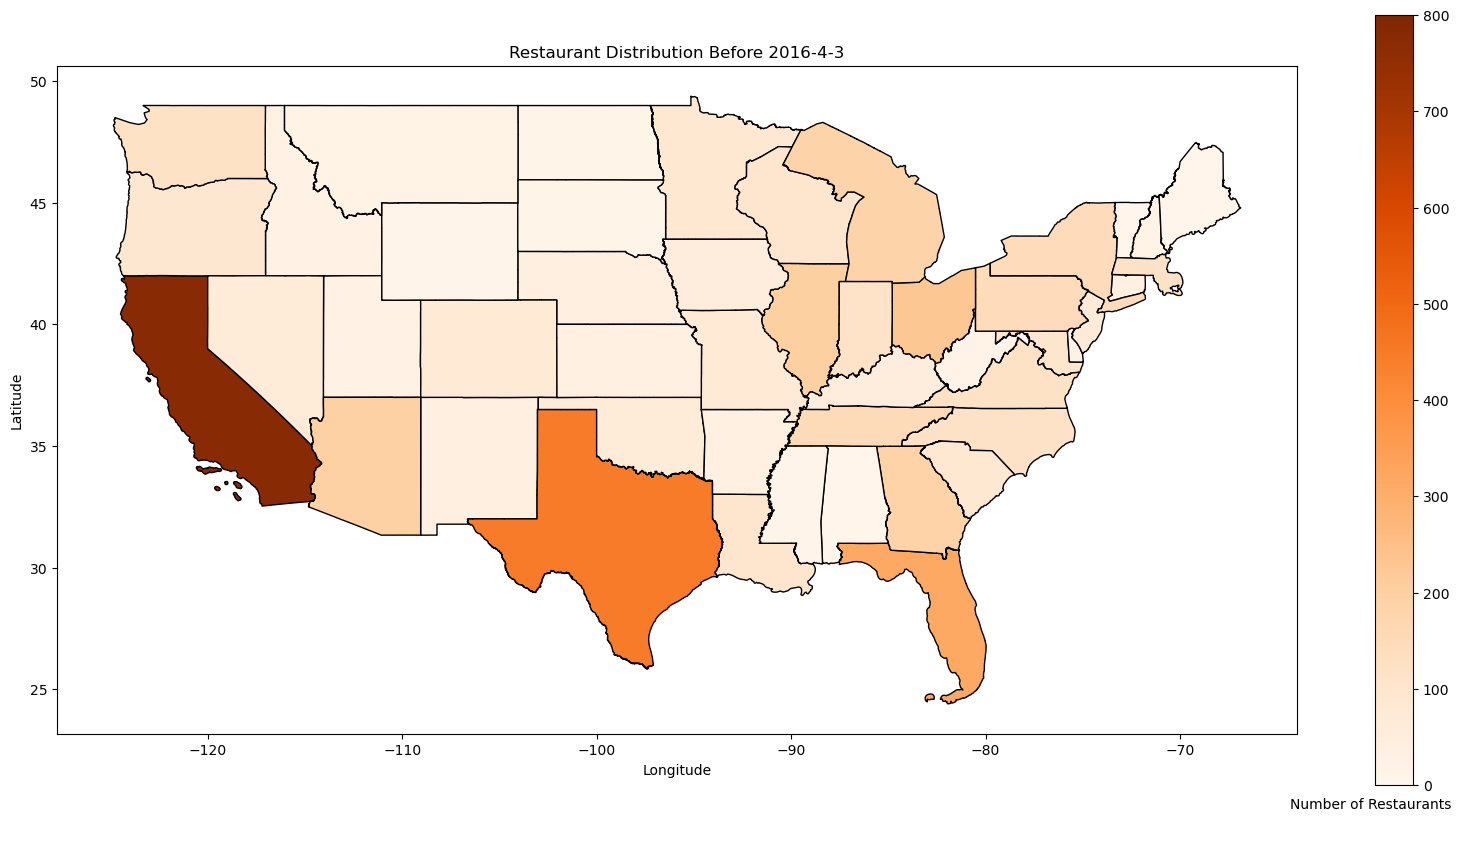

In [46]:
fig, gax = plt.subplots(figsize=(20,10))

state_df4 = pd.merge(state_df, state_data1, on = "STUSPS", how = "inner")
state_df4.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants_before', legend=True, cmap='Oranges',
    vmin=0, vmax=800
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Restaurant Distribution Before 2016-4-3')

gax.annotate('Number of Restaurants',xy=(0.645, 0.05),  xycoords='figure fraction')

In [47]:
stateList2 = dateAfter2.province.value_counts()
state_data2 = stateList2.to_frame()
state_data2 = state_data2.reset_index()
state_data2 = state_data2.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants_after"})
state_data2 = state_data2.set_index("STUSPS")

Text(0.645, 0.05, 'Number of Restaurants')

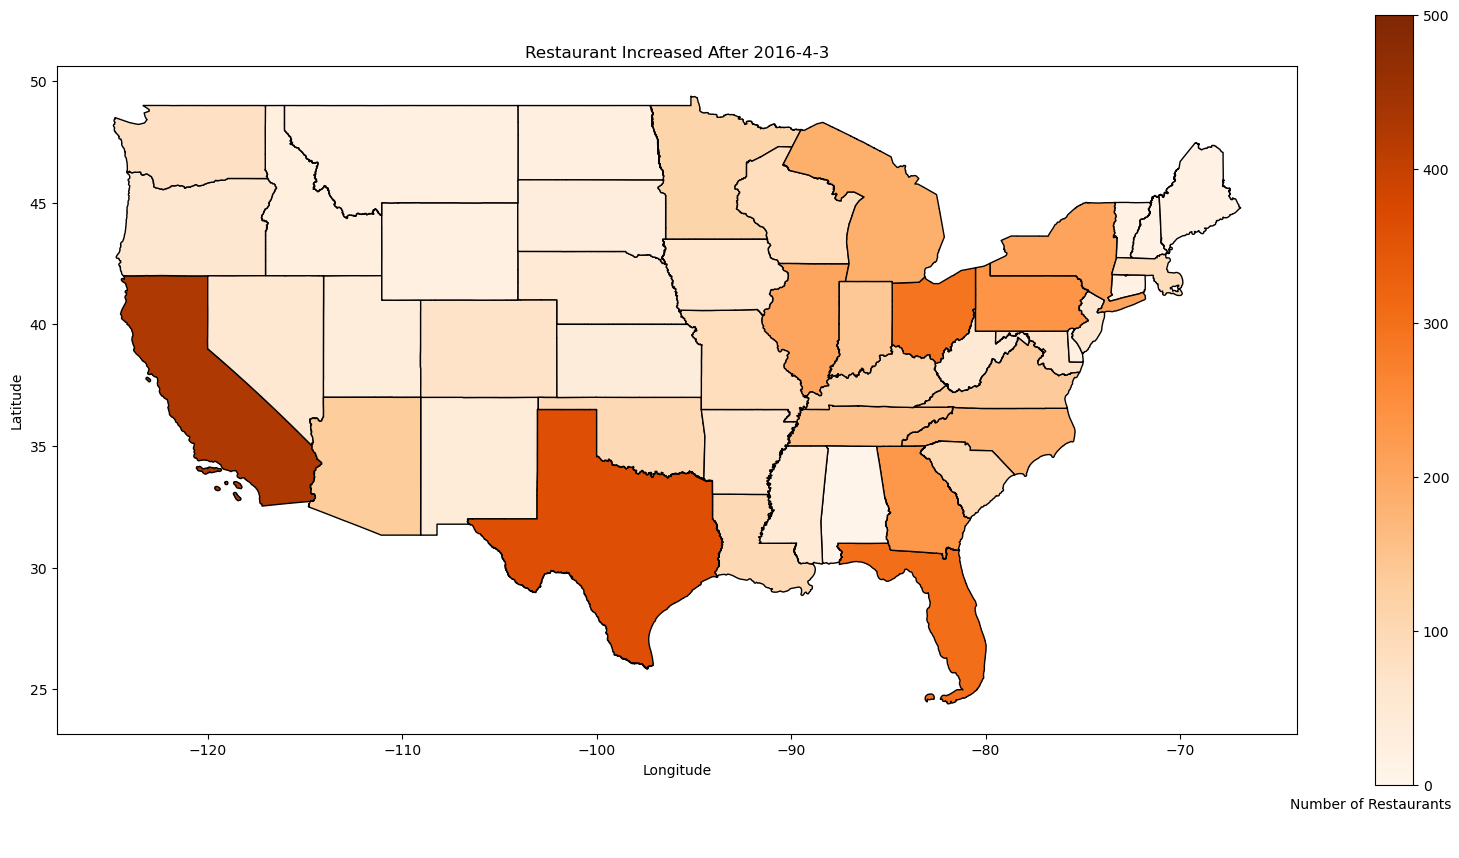

In [48]:
fig, gax = plt.subplots(figsize=(20,10))

state_df5 = pd.merge(state_df, state_data2, on = "STUSPS", how = "inner")
state_df5.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants_after', legend=True, cmap='Oranges',
    vmin=0, vmax=500
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Restaurant Increased After 2016-4-3')

gax.annotate('Number of Restaurants',xy=(0.645, 0.05),  xycoords='figure fraction')

The findings from the visualizations contradict my initial hypothesis, revealing that the fast-food industry continues to favor cities that are already densely populated with competitors. Both maps exhibit strikingly similar color distributions across states, which mirror those of the total number of restaurants and are aligned with population levels.

The observed phenomenon may stem from a relatively untapped market. Cities that already possess a substantial number of fast-food restaurants tend to be among the most prosperous across the country, boasting large populations with varying income levels. According to the perfectly competitive model, when a profitable market is established, it becomes attractive to all firms within the industry. Since the trend only subsides when the economic profit reaches zero, the incessant influx of firms suggests that the market remains lucrative, prompting new entrants to prefer already profitable markets. Consequently, in the current phase, the presence of more fast-food restaurants in a city appears to make it more appealing to new firms in the industry.

The final variable is the brand of existing restaurants. To assess my hypothesis, I have opted to create a map depicting the number of restaurants for the three largest fast-food brands.

In [49]:
fastfood_data5 = fastfood_data.groupby('name')

def statefunc(name):
    df = fastfood_data5.get_group(name)
    df = df.drop(df.columns[[0, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14]], axis=1)
    df = bdate(df, datetime(2016, 4, 3))
    stateList3 = df.province.value_counts()
    state_data3 = stateList3.to_frame()
    state_data3 = state_data3.reset_index()
    state_data3 = state_data3.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants" + name})
    state_data3 = state_data3.set_index("STUSPS")
    return state_data3

fastfood_data_m = statefunc('McDonalds')
fastfood_data_t = statefunc('Taco Bell')
fastfood_data_b = statefunc('Burger King')

fastfood_data_mb = pd.merge(fastfood_data_m, fastfood_data_b, on = "STUSPS", how = "outer")
fastfood_data_mbt = pd.merge(fastfood_data_mb, fastfood_data_t, on = "STUSPS", how = "outer")
fastfood_data_mbt["number_of_restaurants_top"] = fastfood_data_mbt["number_of_restaurantsMcDonalds"] + fastfood_data_mbt["number_of_restaurantsTaco Bell"] + fastfood_data_mbt["number_of_restaurantsBurger King"]
fastfood_data_mbt.fillna(0, inplace=True)
state_df7 = pd.merge(state_df, fastfood_data_mbt, on = "STUSPS", how = "outer")

Text(0.645, 0.05, 'Number of Restaurants')

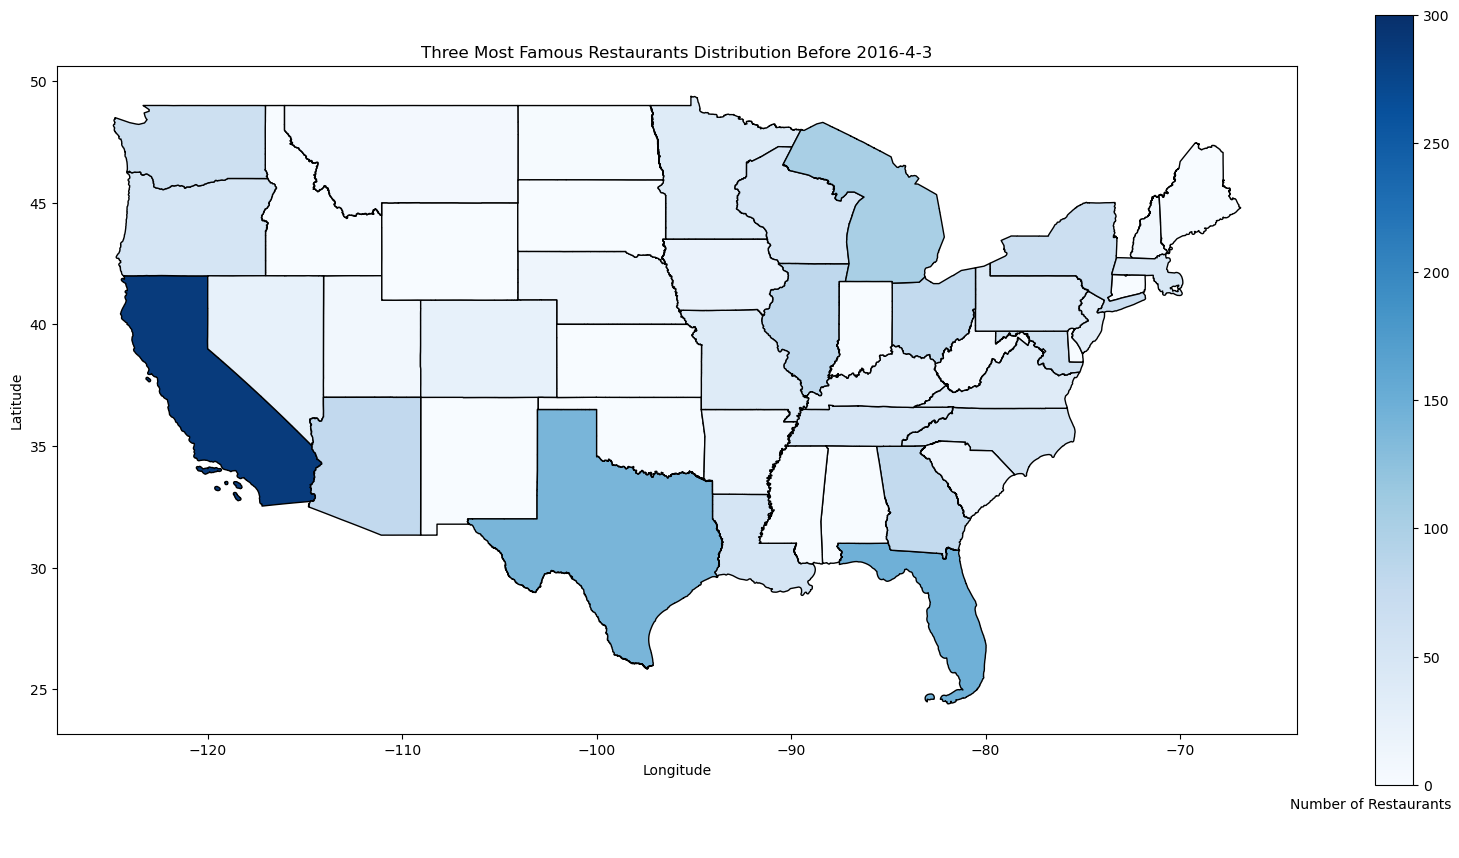

In [50]:
fig, gax = plt.subplots(figsize=(20,10))
state_df7.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants_top', legend=True, cmap='Blues',
    vmin=0, vmax=300
)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Three Most Famous Restaurants Distribution Before 2016-4-3')

gax.annotate('Number of Restaurants',xy=(0.645, 0.05),  xycoords='figure fraction')

Upon creating the aforementioned map, I have observed a surprising outcome whereby the distribution of the three largest fast-food brands exhibits an even stronger correlation with the number of new restaurants than the overall data. This discovery suggests that new entrants tend to follow the lead of industry leaders, rather than avoiding competition with them. As such, this finding contradicts my initial hypothesis and suggests that the presence of well-known fast-food brands may incentivize additional entries into the market.

# Project 3

## 3.1 Potential Data to Scrape

In addition to the variables mentioned in the previous two projects, multiple factors may influence the number of fast-food restaurants in each city. Fast food is likely more favored by certain demographic groups, such as young adults or families with children. Consumer preference is also a considerable factor, which could be reflected by the overweight rate and amount of physical activity of citizens. As fast-food consumption often leads to obesity, fast-food restaurants may be more prevalent in cities with higher rates of overweight individuals. Conversely, cities with a higher rate of physical activity engagement may have fewer fast-food restaurants, assuming citizens are more health-conscious.

To test this hypothesis, it is necessary to collect demographic data, including the ratio of households with children, median age, overweight rate, and physical activity rate in each region. These variables offer a more detailed definition of the population and provide fresh perspectives regarding the research topic. The website selected for data collection is city-data.com, which records statistical data of regions across America, including all the necessary variables. The regions are classified according to zip code, and the data is stored in a table format with zip codes as rows and the variables as columns.

In the initial dataset, the zip codes for each fast-food establishment are also documented. Consequently, I can systematize the data by tallying the number of restaurants that share the same zip code. This approach can be employed to combine the gathered data, which will comprise the count of restaurants, households, households with children, the ratio of children, overweight rates, and physical activity rates of diverse regions classified by zip code. The final table will be expedient for visualization, and dot graphs accompanied by trend lines can be utilized to ascertain the correlations amid these variables. 

## 3.2 Potential Challenges

Scraping the website poses multiple challenges, the major issue being that the data is only accessible in the map part of the webpage. The specific requirements, such as the overweight rate, must be selected within the map section, and the corresponding region on the map must be hovered over to view the data. The values needed are not directly stored on the HTML page, making scraping this kind of data challenging. I overcame this obstacle by finding the data on other pages of the website, which only possess part of the variables I expected to cover in my paper. Some variables had to be given up due to the difficulty in extracting them.

The vast amount of data also makes scraping challenging, and going over more than 5000 web pages to obtain the necessary data can be time-consuming. During the process, various problems may arise, such as network disconnection, unexpected text occurrences, and missing specific data. It is exceedingly exasperating to surmount this issue: I am compelled to remain alongside the computer and monitor the progress regularly, lest the program terminates without my notice.

Despite the challenges, part of the required data, including median age, household number, and the number of households with children, was successfully scraped. This experience highlights the need to learn more methods of web scraping to extract data from various web pages.

## 3.3 Scraping Data from a Website

The following code represents the complete scraping process. Due to the time-intensive nature of scraping more than 5000 web pages, I commented on these codes and ran them on another file. The results are stored in a CSV file, which is presented below.

In [51]:
import requests
from bs4 import BeautifulSoup
import re

Get a list of URLs:

In [52]:
zipCodeList = fastfood_data.postalCode.value_counts()
zipCode_data = zipCodeList.to_frame()
zipCode_data = zipCode_data.reset_index()
zipCode_data = zipCode_data.rename(columns = {"index": "Code", "postalCode": "number_of_restaurants"})
zipCode_data['Website'] = ['https://www.city-data.com/zips/{}.html'.format(y) for y in zipCode_data['Code']]

In [53]:
#medianAge = []

#for i in range(zipCode_data.shape[0]):
#    url = zipCode_data['Website'][i]
#    response = requests.get(url)
#    soup_object = BeautifulSoup(response.content)
#    agev = soup_object.find(text = 'Median resident age:')
#    if agev is None:
#        value = 0
#    else:
#        table = agev.find_next('table')
#        textvalue = table.find_all('td')[1].text
#        value = float(re.findall(r'\d+\.\d+', textvalue)[0])
#    medianAge.append(value)

In [54]:
#Householdnum = []
#Householdcnum = []

#for i in range(zipCode_data.shape[0]):
#    url = zipCode_data['Website'][i]
#    response = requests.get(url)
#    soup_object = BeautifulSoup(response.content)
#    hounumv = soup_object.find(text = 'Households:')
#    if hounumv is None:
#        Householdnum.append(0)
#    else:
#        hounum = hounumv.next_element.strip()
#        hounum = int(hounum.replace(',', ''))
#        Householdnum.append(hounum)
#    houcnumv = soup_object.find(text = 'married couples with children.')
#    if houcnumv is None:
#        Householdcnum.append(0)
#    else:
#        houcnum = houcnumv.previous_element.previous_element.strip()
#        houcnum = int(houcnum.replace('\n', '').replace('\r', '').replace(',', ''))
#        Householdcnum.append(houcnum)

In [55]:
#scraping_data['Code'] = zipCode_data['Code']
#scraping_data['Age'] = medianAge
#scraping_data['Household Number'] = Householdnum
#scraping_data['Household with Children Number'] = Householdcnum
#scraping_data['Household with Children Ratio'] = scraping_data['Household with Children Number'] / scraping_data['Household Number']
#scraping_data.to_csv('Zip_Code.csv', index = False)

In [56]:
scrapingdata = pd.read_csv('Zip_Code.csv')
scrapingdata.head()

,Code,Age,Household Number,Household with Children Number,Household with Children Ratio
0,78209,39.7,43118,6649,0.154205
1,30606,33.2,45952,5199,0.113140
2,92647,36.9,62877,7924,0.126024
3,75150,33.2,61332,8083,0.131791
4,32809,35.5,29412,2760,0.093839


Here are a few sample codes showing how I scrape the data:

Find the median age by zip code:

In [57]:
url = zipCode_data['Website'][0]
response = requests.get(url)

In [58]:
soup_object = BeautifulSoup(response.content)
agev = soup_object.find(text = 'Median resident age:')
if agev is None:
    value = 0
else:
    table = agev.find_next('table')
    textvalue = table.find_all('td')[1].text
    value = float(re.findall(r'\d+\.\d+', textvalue)[0])
    
value

39.7

Initially, retrieve the content of the website in accordance with the given URL.

Subsequently, employ the BeautifulSoup library to rearrange the content.

Thirdly, pinpoint the data by identifying the keyword ‘Median resident age:’.

Fourthly, given that the structure of the data is ‘Median resident age:’ followed by a table that displays the median age of individuals in the specified zip code as well as that of individuals in the entire state, extract the data by identifying the subsequent table of the aforementioned keyword and convert the relevant cell content into floating-point values. If this data is absent, substitute it with 0.

Find the household number and household with children number:

In [59]:
soup_object = BeautifulSoup(response.content)
hounumv = soup_object.find(text = 'Households:')
if hounumv is None:
    hounum = 0
else:
    hounum = hounumv.next_element.strip()
    hounum = int(hounum.replace(',', ''))
houcnumv = soup_object.find(text = 'married couples with children.')
if houcnumv is None:
    houcnum = 0
else:
    houcnum = houcnumv.previous_element.previous_element.strip()
    houcnum = int(houcnum.replace('\n', '').replace('\r', '').replace(',', ''))
    
value = (hounum, houcnum)
value

(43118, 6649)

Within the same website, identify two additional keywords, namely ‘Households:’ and ‘married couples with children.’

The household count immediately follows the keyword ‘Households:’; thus, retrieve this value utilizing the subsequent element method. Conversely, as the with-children household number precedes the keyword, the corresponding values can be obtained via the previous element method.

## 3.4 Merging the Scraped Dataset

Outer merge the two tables. The final dataset has 5747 rows and each row has 4 observations.

In [60]:
zipCode_data2 = pd.merge(zipCode_data, scrapingdata, on = 'Code', how = 'outer')
zipCode_data2.head()

,Code,number_of_restaurants,Website,Age,Household Number,Household with Children Number,Household with Children Ratio
0,78209,10.0,https://www.city-data.com/zips/78209.html,39.7,43118.0,6649.0,0.154205
1,30606,9.0,https://www.city-data.com/zips/30606.html,33.2,45952.0,5199.0,0.113140
2,92647,9.0,https://www.city-data.com/zips/92647.html,36.9,62877.0,7924.0,0.126024
3,75150,9.0,https://www.city-data.com/zips/75150.html,33.2,61332.0,8083.0,0.131791
4,32809,9.0,https://www.city-data.com/zips/32809.html,35.5,29412.0,2760.0,0.093839


In [61]:
zipCode_data2.shape[0]

5747

## 3.5 Visualizing the Scraped Dataset

Text(0, 0.5, 'Number of restaurants')

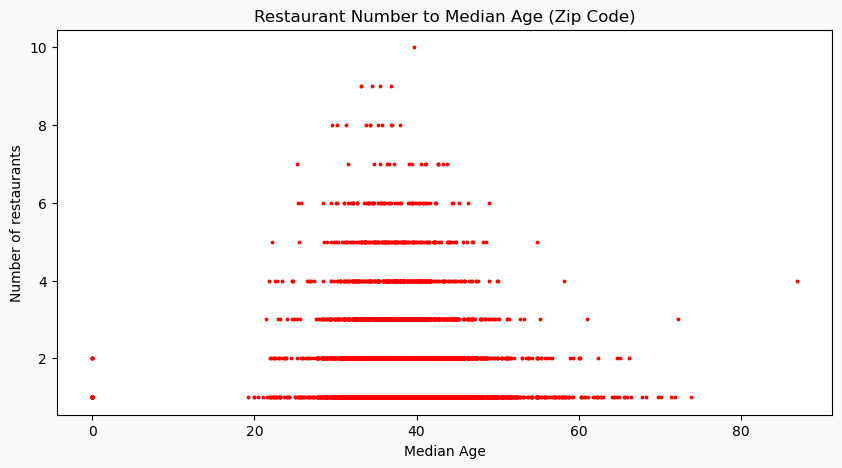

In [62]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
zipCode_data2.plot(kind = "scatter", x = "Age", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Restaurant Number to Median Age (Zip Code)")
ax.set_xlabel("Median Age")
ax.set_ylabel("Number of restaurants")

Given that zip codes demarcate the United States into small geographical areas, the count of fast-food establishments in each region varies between 0 and 10. Consequently, the scattered plot depicts ten lines, wherein the length of each line decreases as the number of fast-food restaurants increases. The lines corresponding to the regions with the highest concentration of fast-food establishments are situated within the range of 30 to 40.

The results partially support my hypothesis that certain groups of people favor fast food, but not necessarily young adults. Individuals around the age of 35 constitute the majority of the labor force in the market and value their time spent working more than waiting for meals in a formal restaurant or cooking. In other words, the wage is valued more than the potential negative health effects, and the opportunity cost of spending too much time on meals is high. As the name implies, fast food is "fast" and convenient, suiting the demands of middle-aged workers.

Text(0, 0.5, 'Number of restaurants')

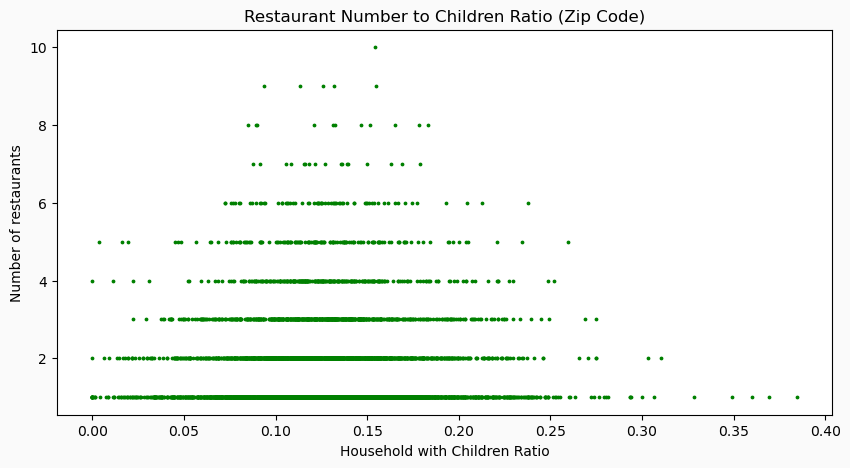

In [63]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
zipCode_data2.plot(kind = "scatter", x = "Household with Children Ratio", y = "number_of_restaurants", ax = ax, s = 3, color = "Green")

ax.set_title("Restaurant Number to Children Ratio (Zip Code)")
ax.set_xlabel("Household with Children Ratio")
ax.set_ylabel("Number of restaurants")

The plot unambiguously illustrates that there is no correlation between the ratio of children and the number of fast-food restaurants. Consequently, my hypothesis is invalid. This phenomenon could potentially be attributed to the fact that children's diets are heavily influenced by their parents, who restrict their intake of fast-foods due to health concerns.

## 3.4 Adding a New Dataset

Another dataset found on the simplemap website can complement the results obtained from scraping the city-data.com website. This table contains demographic information for each city in America and includes variables such as median age, gender ratio, marriage ratio, percentage of citizens having education higher than college, labor force participation rate, unemployment rate, and race ratio. Race ratio may also be related to the number of restaurants as obesity rates vary among different racial groups. Combining the two visualizations can produce a more accurate conclusion.

In addition to the median age, the new dataset also comprises other variables, such as gender ratio, marriage ratio, percentage of citizens with higher education than college, labor force participation rate, unemployment rate, and race ratio. Among these variables, the race ratio may also be correlated with the number of restaurants. According to the "Overweight & Obesity Report" from the US National Center for Health Statistics, the prevalence of obesity in white adults is 42.2%, in black adults, it is 49.6%, and in Asian adults, it is 17.4%. The existence of such groups may lead to an increased demand for fast food, resulting in more restaurants being present in cities with higher ratios of black and white populations, provided that the populations are not significantly different.

Import the dataset and merge it with the existing city data.

In [64]:
city_data_demo = pd.read_csv('uscities_Demographic.csv')
data1_m = data1.reset_index()
data2 = pd.merge(city_data_demo, data1, on = 'city', how = 'outer')

Since too small cities cannot provide supportive data, I only keep the cities with populations larger than 50,000.

In [65]:
data2 = data2.drop('population_y', axis = 1)
data2 = data2[data2.population_x > 50000]
data2 = data2.rename(columns = {"population_x": "population"})
data2['race_black&white'] = data2['race_white'] + data2['race_black']

(0.0, 120.0)

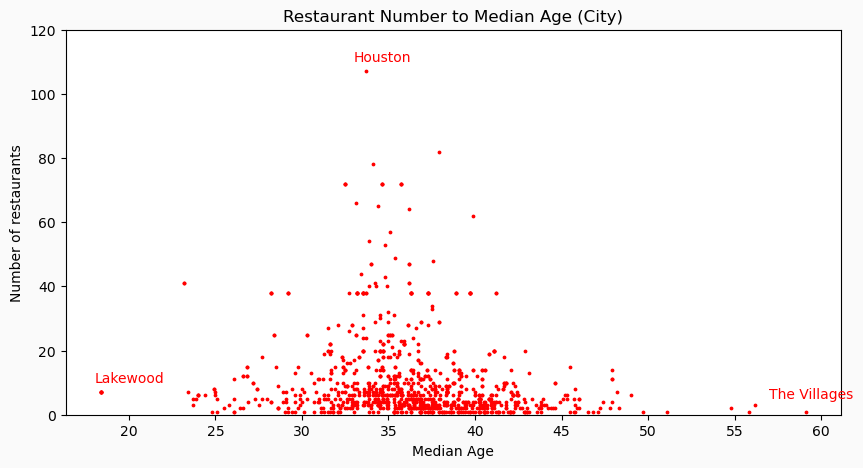

In [66]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data2.plot(kind = "scatter", x = "age_median", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Restaurant Number to Median Age (City)")
ax.set_xlabel("Median Age")
ax.set_ylabel("Number of restaurants")

ax.text(33, 110, "Houston", color='red')
ax.text(18, 10, "Lakewood", color='red')
ax.text(57, 5, "The Villages", color='red')

plt.ylim(0, 120)

The scatter plot demonstrates that cities with a median age of around 35 are the most attractive for fast-food restaurants. The dots denote the high number of restaurants concentrated in the area where the x-value is approximately 32 to 37. Houston serves as the most representative example, with the highest number of fast-food restaurants and a median age of 33.7. In contrast, cities predominantly consisting of young or elderly populations, such as Lakewood and The Villages, have only a few restaurants.

This result solidifies the conclusion I draw from the scraping data.

In [67]:
data3 = data2.copy()
data3 = data3[data3['lng'] > -140]
data3['Coordinates'] = list(zip(data3.lng, data3.lat))
data3['Coordinates'] = data3['Coordinates'].apply(Point)
citymapd = gpd.GeoDataFrame(data3, geometry= 'Coordinates')

Text(0.5, 1.0, 'Number of Fastfood Restaurants in Each City')

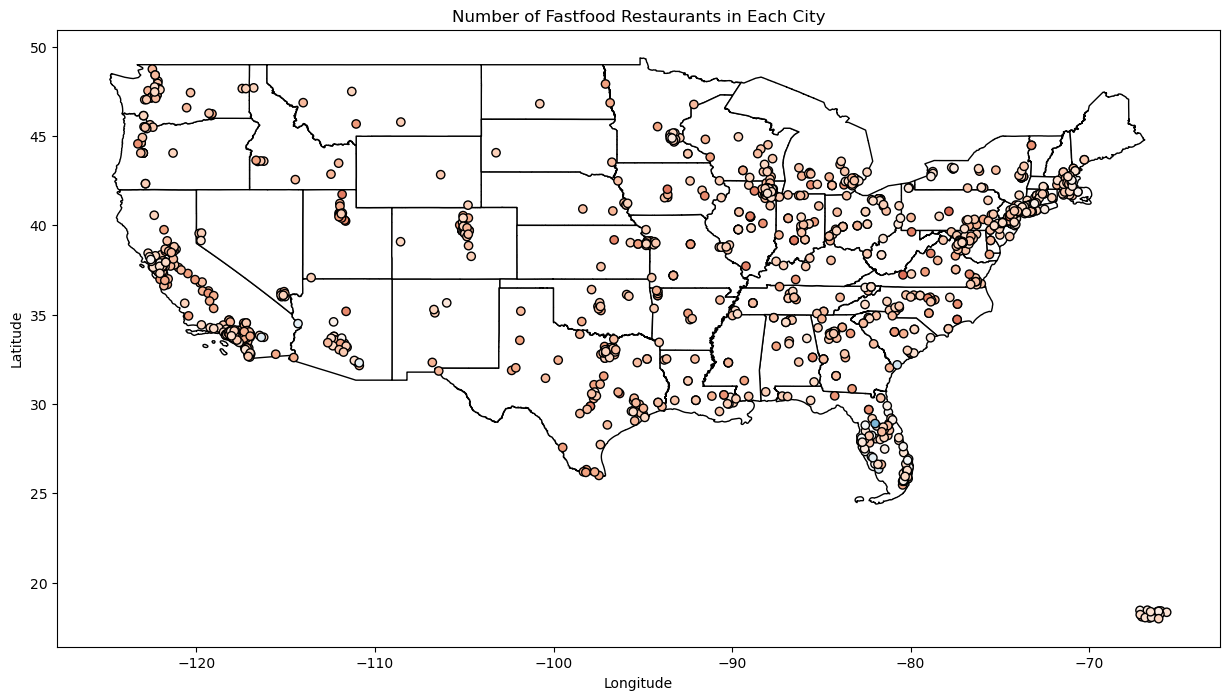

In [68]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, gax = plt.subplots(figsize=(15,15))

state_df.plot(ax=gax, edgecolor="black", color="white")

citymapd.plot(ax=gax, edgecolor='black', column = 'age_median', legend=False, cmap='RdBu', vmin=0, vmax=100)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Number of Fastfood Restaurants in Each City')

With regards to the race ratio variable, I have also generated a map that illustrates the median age of each region in the United States. To create this map, I employed a 'RdBu' colormap which transitions from red to white to blue as the value increases. Upon analysis of the resulting map, it becomes evident that a significant portion of the regions are represented by the color light red, indicating a consistent distribution of median ages across the United States. This observation is in line with the previously identified dot distribution.

(0.0, 120.0)

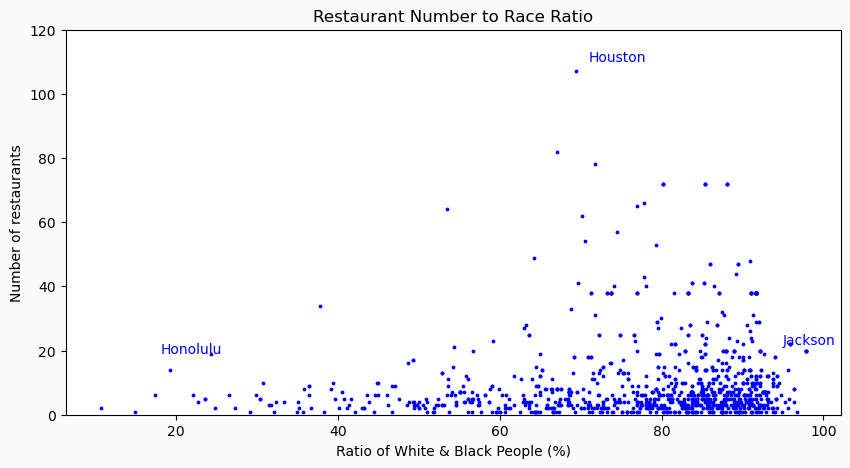

In [69]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data2.plot(kind = "scatter", x = "race_black&white", y = "number_of_restaurants", ax = ax, s = 3, color = "blue")

ax.set_title("Restaurant Number to Race Ratio")
ax.set_xlabel("Ratio of White & Black People (%)")
ax.set_ylabel("Number of restaurants")

ax.text(71, 110, "Houston", color='blue')
ax.text(18, 19, "Honolulu", color='blue')
ax.text(95, 22, "Jackson", color='blue')

plt.ylim(0, 120)

The graph illustrates that my assumption about the race ratio is incorrect. This outcome may be because the population has a stronger association with restaurant numbers than the race factor.

Based on the previous conclusion, cities with higher populations have more fast-food restaurants. These metropolitan areas attract people from all over the world, resulting in a relatively low ratio of white and black individuals. The cities with the most fast-food restaurants have a population percentage ranging from roughly 60% to 80%. In contrast, regions consisting predominantly of white or black individuals, or other races, have fewer fast-food restaurants.

# OLS Regression

In [70]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [71]:
data1_reg = data1.copy()
data1_reg.head(1)

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0


In [72]:
data1_reg['const'] = 1
data1_reg['population_adjusted'] = [x/1000000 for x in data1_reg['population']]
data1_reg['density_adjusted'] = [x/100 for x in data1_reg['density']]
data1_reg['income_adjusted'] = [x/100000 for x in data1_reg['income_household_median']]

In [73]:
X1 = ['const', 'population_adjusted']
X2 = ['const', 'population_adjusted', 'density_adjusted']

reg1_1 = sm.OLS(data1_reg['number_of_restaurants'], data1_reg[X1], missing='drop').fit()
reg1_2 = sm.OLS(data1_reg['number_of_restaurants'], data1_reg[X2], missing='drop').fit()
stargazer = Stargazer([reg1_1, reg1_2])
HTML(stargazer.render_html())

In [74]:
X3 = ['const', 'income_adjusted']
X4 = ['const', 'population_adjusted', 'income_adjusted']
X10 = ['const', 'population_adjusted', 'income_adjusted', 'density_adjusted']

reg2_1 = sm.OLS(data1_reg['number_of_restaurants'], data1_reg[X3], missing='drop').fit()
reg2_2 = sm.OLS(data1_reg['number_of_restaurants'], data1_reg[X4], missing='drop').fit()
reg2_3 = sm.OLS(data1_reg['number_of_restaurants'], data1_reg[X10], missing='drop').fit()
stargazer = Stargazer([reg2_1, reg2_2, reg2_3])
HTML(stargazer.render_html())

In [75]:
state_reg = state_data.copy()
pop_data_state_reg = pop_data_state.copy()
state_reg = state_reg.reset_index()
state_data1_reg = state_data1.copy()
state_data1_reg = state_data1_reg.reset_index()
state_data2_reg = state_data2.copy()
state_data2_reg = state_data2_reg.reset_index()
pop_data_state_reg = pop_data_state_reg.reset_index()
state_reg = pd.merge(state_reg, pop_data_state_reg, on = "STUSPS", how = "outer")
state_reg = pd.merge(state_reg, income_data_state, on = "NAME", how = "outer")
state_reg = state_reg.dropna()
state_reg = pd.merge(state_reg, state_data1, on = "STUSPS", how = "outer")
state_reg = pd.merge(state_reg, state_data2, on = "STUSPS", how = "outer")
state_reg = pd.merge(state_reg, fastfood_data_mbt, on = "STUSPS", how = "outer")
state_reg.fillna(0, inplace=True)
state_reg.drop(index=[48, 49], inplace=True)
state_reg["number_of_restaurants_top"] = state_reg["number_of_restaurantsMcDonalds"] + state_reg["number_of_restaurantsTaco Bell"] + state_reg["number_of_restaurantsBurger King"]
state_reg.head()

,STUSPS,number_of_restaurants,NAME,Population,Median income,number_of_restaurants_before,number_of_restaurants_after,number_of_restaurantsMcDonalds,number_of_restaurantsBurger King,number_of_restaurantsTaco Bell,number_of_restaurants_top
0,CA,1201.0,California,39512223.0,84907.0,775.0,426.0,105.0,105.0,76.0,286.0
1,TX,811.0,Texas,28995881.0,66963.0,449.0,362.0,80.0,32.0,28.0,140.0
2,FL,621.0,Florida,21477737.0,63062.0,318.0,303.0,78.0,24.0,45.0,147.0
3,OH,522.0,Ohio,11689100.0,62262.0,228.0,294.0,37.0,20.0,21.0,78.0
4,GA,420.0,Georgia,10617423.0,66559.0,190.0,230.0,41.0,12.0,25.0,78.0


In [76]:
state_reg['population_adjusted'] = [x/100000 for x in state_reg['Population']]
state_reg['income_adjusted'] = [x/1000 for x in state_reg['Median income']]
state_reg['const'] = 1

In [77]:
X5 = ['const', 'population_adjusted']
X6 = ['const', 'population_adjusted', 'income_adjusted']

reg3_1 = sm.OLS(state_reg['number_of_restaurants'], state_reg[X5], missing='drop').fit()
reg3_2 = sm.OLS(state_reg['number_of_restaurants'], state_reg[X6], missing='drop').fit()
stargazer = Stargazer([reg3_1, reg3_2])
HTML(stargazer.render_html())

In [78]:
X7 = ['const', 'number_of_restaurants_before']
X8 = ['const', 'number_of_restaurants_top']
X9 = ['const', 'number_of_restaurants_before', 'number_of_restaurants_top']

reg4_1 = sm.OLS(state_reg['number_of_restaurants_after'], state_reg[X7], missing='drop').fit()
reg4_2 = sm.OLS(state_reg['number_of_restaurants_after'], state_reg[X8], missing='drop').fit()
reg4_3 = sm.OLS(state_reg['number_of_restaurants_after'], state_reg[X9], missing='drop').fit()
stargazer = Stargazer([reg4_1, reg4_2, reg4_3])
HTML(stargazer.render_html())

## 3.5 Conclusion

Based on the conducted investigations, it is possible to draw conclusions regarding the relationships between the independent variables and the outcome variable.

Firstly, there exists a positive correlation between population and the number of fast-food restaurants in the market. Typically, higher population leads to higher demand, which can attract firms to enter the local market.

Secondly, income appears to exhibit a weak negative correlation with the number of fast-food restaurants, although this relationship is not very strong. This correlation only seems to exist among cities with sufficiently large populations, and there is significant deviation among the scatter points.

Thirdly, population density appears to be inconsequential to the outcome, as the scatter points exhibit almost random patterns and the trend line remains horizontal.

Lastly, by mapping the data, a clear view of how the last two variables impact the outcome emerges, revealing that fast-food restaurants tend to position themselves in cities that are already saturated with competitors. Additionally, the number of large-brand restaurants demonstrates a more significant positive correlation with the dependent variable. These phenomena may result from the fact that markets in these cities have unmet demand and remain highly profitable.

It has been determined through additional inquiries that individuals who are approximately 35 years old comprise a significant portion of the fast-food consumer base. Therefore, cities with a median age of 35 may potentially attract a greater number of fast-food establishments.

## Citations

- Kaggle: https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants?select=Datafiniti_Fast_Food_Restaurants_May19.csv

- Simplemap: https://simplemaps.com/data/us-cities

- city-data: https://www.city-data.com/

- 'Overweight and Obesity', U.S. Department of Health and Human Services, https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity

- Population: https://data.census.gov/tableq=population+by+state&g=0400000US10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72,05,02,08,01,06,09,04&tid=PEPPOP2019.PEPANNRES

- Income: https://data.census.gov/tableq=S1901:+INCOME+IN+THE+PAST+12+MONTHS(IN+2018+INFLATIONADJUSTED+DOLLARS)&g=0400000US10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72,05,02,08,01,06,09,04&tid=ACSST1Y2021.S1901&moe=false&tp=true